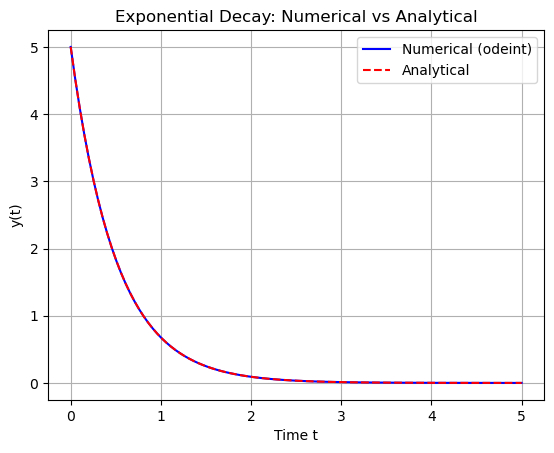

In [31]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
a = 2        # decay rate
y0 = 5       # initial condition
t = np.linspace(0, 5, 100)  # time from 0 to 5

# Define the ODE: dy/dt = -a * y
def model(y, t, a):
    return -a * y

# Solve ODE numerically
y_num = odeint(model, y0, t, args=(a,))

# Solve analytically
y_analytical = y0 * np.exp(-a * t)

# Plot both
plt.plot(t, y_num, 'b-', label='Numerical (odeint)')
plt.plot(t, y_analytical, 'r--', label='Analytical')
plt.xlabel('Time t')
plt.ylabel('y(t)')
plt.legend()
plt.title("Exponential Decay: Numerical vs Analytical")
plt.grid(True)
plt.show()


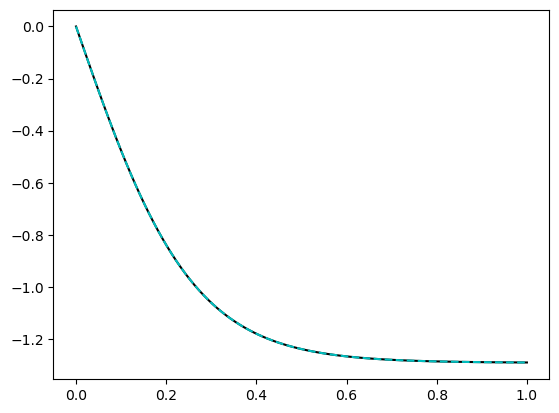

In [ ]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np


def dvdt(v,t):
  return 3*v**2-5
v0=0
t=np.linspace(0,1,100)
soln=odeint(dvdt, y0=v0,t=t)

def model2(t,v):
  return 3*v**2-5

soln2=odeint(model2, y0=v0, t=t ,tfirst=True)
plt.plot(t,soln.T[0],color="k")
plt.plot(t,soln2.T[0],"--", color="c")

In [16]:
soln.T[0]

array([ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
       -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
       -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
       -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
       -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
       -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
       -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
       -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
       -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
       -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
       -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
       -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
       -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
       -1.27512464, -1.2763122 , -1.27741137, -1.27842865, -1.27

In [19]:
from scipy.integrate import solve_ivp
v0=0
t=np.linspace(0,1,100)
solution=solve_ivp(model2, t_span=(0,1),y0=[v0],t_eval=t)
solution.y[0]

array([ 0.        , -0.0504793 , -0.10080722, -0.15083038, -0.20039553,
       -0.24935878, -0.29758564, -0.34495103, -0.39133929, -0.43664418,
       -0.48076886, -0.52362591, -0.56513507, -0.60524282, -0.64391404,
       -0.68112062, -0.71684143, -0.75106235, -0.78377623, -0.81498294,
       -0.84468932, -0.87290923, -0.89966349, -0.92497994, -0.94889341,
       -0.97144571, -0.99268566, -1.01266906, -1.03145871, -1.04912441,
       -1.06573928, -1.08134937, -1.09599363, -1.10971235, -1.12254598,
       -1.13453506, -1.14572027, -1.15614242, -1.16584241, -1.17486131,
       -1.18324028, -1.19102062, -1.19824374, -1.20495119, -1.21118463,
       -1.21698585, -1.22239666, -1.22744653, -1.23215067, -1.23652537,
       -1.24058697, -1.24435186, -1.24783652, -1.25105747, -1.25403128,
       -1.25677462, -1.25930417, -1.2616367 , -1.26378904, -1.26577807,
       -1.26762074, -1.26933406, -1.27093508, -1.27243817, -1.27384571,
       -1.27515955, -1.27638204, -1.27751582, -1.27856386, -1.27

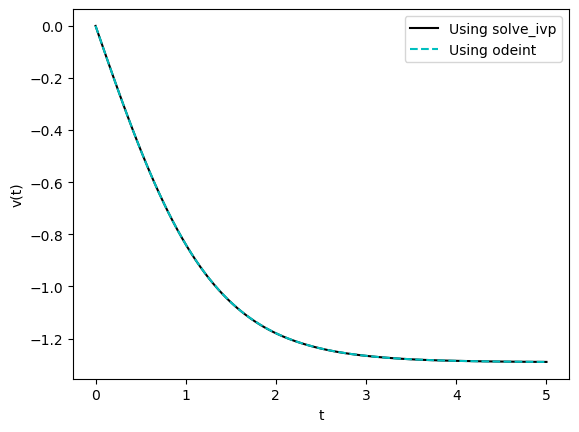

In [33]:
plt.plot(t,solution.y[0],'k',label="Using solve_ivp")

plt.plot(t,soln.T[0],'--',color='c',label="Using odeint")
plt.xlabel("t")
plt.ylabel("v(t)")
plt.legend()
plt.show()


## Coupled first order ODEs


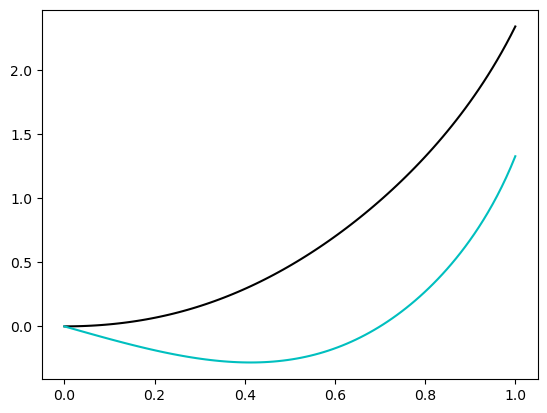

In [38]:
def dSdx(S,x):
  y1,y2=S
  return [ y1+y2**2+3*x,
          3*y1+y2**3-np.cos(x)]
y1_0=0
y2_0=0
S_0=(y1_0,y2_0)

x=np.linspace(0,1,100)

soln=odeint(dSdx, y0=S_0, t=x)
y1=soln[:,0]
y2=soln[:,1]

plt.plot(x,y1,color="k")
plt.plot(x,y2,color="c")

## Second order ODEs


In [55]:
def dsdx(s,x):
  x,v=s
  return [v, -v**2*np.sin(x)]

x_0=0
v_0=5
s_0=[x_0,v_0]
x=np.linspace(0,1,100)
soln=odeint(dsdx, y0=s_0, t=x)

In [56]:
x_soln=soln[:,0]
y_soln=soln[:,1]


array([5.        , 4.993634  , 4.97466469, 4.94347229, 4.90066812,
       4.84706399, 4.78363301, 4.71146603, 4.63172658, 4.54560777,
       4.45429355, 4.35892612, 4.26058043, 4.1602454 , 4.05881222,
       3.95706841, 3.85569675, 3.75527824, 3.65629754, 3.55915048,
       3.46415261, 3.37154819, 3.28151916, 3.19419384, 3.10965489,
       3.02794676, 2.94908218, 2.87304809, 2.79981064, 2.72931959,
       2.66151191, 2.59631504, 2.53364945, 2.4734308 , 2.41557177,
       2.35998346, 2.30657656, 2.25526228, 2.20595309, 2.15856323,
       2.1130092 , 2.06921004, 2.02708754, 1.98656639, 1.94757426,
       1.91004183, 1.87390279, 1.83909383, 1.80555453, 1.77322733,
       1.74205744, 1.71199271, 1.68298357, 1.65498292, 1.627946  ,
       1.60183028, 1.57659539, 1.55220298, 1.52861665, 1.50580182,
       1.48372567, 1.46235702, 1.44166625, 1.42162523, 1.40220722,
       1.38338681, 1.36513986, 1.34744339, 1.33027555, 1.31361557,
       1.29744366, 1.28174099, 1.26648963, 1.25167249, 1.23727

C:\Users\dell\AppData\Local\Temp\ipykernel_12144\2569885371.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


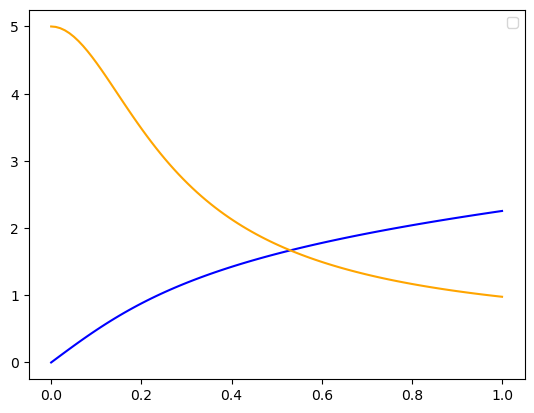

In [61]:
plt.plot(x,x_soln,color="b")
plt.plot(x,y_soln,color='orange')
plt.legend()
plt.show()

## Coupled Higher order equations

In [62]:
def dsdx(s,t):
  x1,v1,a1,x2,v2,a2=s
  return [v1,a1,-2*v2**2+x2, v2, a2, -a1**3+v2+x1+np.sin(t)]
x1_0=0
v1_0=0
a1_0=0
x2_0=0
v2_0=0
a2_0=0
s0=(x1_0,v1_0,a1_0,x2_0,v2_0,a2_0)

t=np.linspace(0,1,100)
soln=odeint(dsdx,y0=s0,t=t)

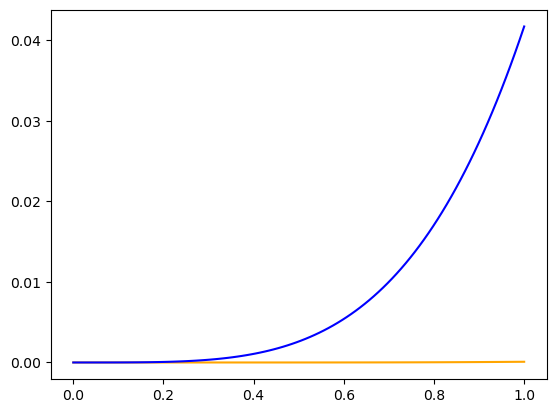

In [65]:
soln_x1=soln[:,0]
soln_x2=soln[:,3]
plt.plot(t,soln_x1,color='orange')
plt.plot(t,soln_x2,color='b')